In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# create training &test data
x_train = np.random.rand(1000)
x_test = np.random.rand(200)
y_train = x_train*5 + 3
y_test = x_test*5 + 3

# create tensors from numpy arrays
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [3]:
# Define model functions
def my_model(w,b,x):
    y_h = w*x + b
    return y_h

def loss_fn(y_h,y):
    loss = ((y_h - y)**2).mean()
    return loss

def get_grad(x,y,y_h):
    dw = (2*(y_h - y)*x).mean()
    db = 2*(y_h - y).mean()
    return (dw, db)

In [4]:
# initialize weights
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
print("Initial weights:w={},b={}".format(w.item(),b.item()))

Initial weights:w=0.5802379846572876,b=-0.855524480342865


In [5]:
# try once: compare auto-grad with hand-calculate results
y_h = my_model(w,b,x_train)
loss = loss_fn(y_h,y_train)

loss.backward()
print('grad by autograd: dw={},db={}'.format(w.grad.item(), b.grad.item()))

with torch.no_grad():
    dw,db = get_grad(x_train,y_train,y_h)
    print('grad by hand-calc: dw={},db={}'.format(dw.item(), db.item()))

# clear grads because grads will add up by default
w.grad = torch.zeros_like(w.grad)
b.grad = torch.zeros_like(b.grad)

grad by autograd: dw=-6.876355171203613,db=-12.176223754882812
grad by hand-calc: dw=-6.876355031571589,db=-12.176223665704123


In [6]:
# store loss and val_loss for plotting
loss_values = []
val_loss_values = []

optimizer = torch.optim.SGD((w,b), lr=0.01)

# Training loop
for i in range(1000):
    y_h = my_model(w,b,x_train)
    loss = loss_fn(y_h,y_train)
    
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
    
    with torch.no_grad():
        # store loss values
        if i%5 == 0:
            val_y_h = my_model(w,b, x_test)
            val_loss = loss_fn(val_y_h, y_test)
            loss_values.append(loss)
            val_loss_values.append(val_loss)

print("Trained weights:w={},b={}".format(w,b))

Trained weights:w=tensor([4.5022], requires_grad=True),b=tensor([3.2688], requires_grad=True)


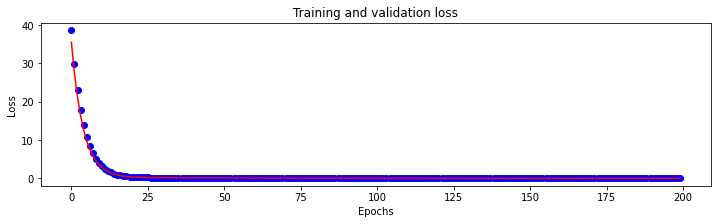

In [7]:
# plot learning curve
plt.figure(figsize = (12,3))
plt.plot(loss_values, 'bo', label='Training loss')
plt.plot(val_loss_values, 'r', label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()